Dataset Directories

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T122710Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbbd27a03bceeb9868392b8d9f9a505dfa6c97cf5e11857dcb9f178cd6432d5ea803921ec38a497248e90474325d9af702f0b7598c0f122861910412af939f44aeba49d8ac1931deb16732f978c1cd716bf2cbb52743487c6c7231078211fe4c7c6137abc5abc814ad57f5fcf11a8a7de4a7ac2a5e7e8d3499d96a8abcc68ab5c8e01be0b13fba77aec6a536e33827e890fc6b470d490c6f680e4e0c9e47d979e302d3bf32debb69878bd333de7de81b69308f63d2becca22e2a40d64b0286d253667a5a2384a3866102085c4ae3ad42e5611888526c8a91a019a6819b8312b7683dada3fd4cb2480a7acbfec038421ffed249745017ec3630525aeb311c2e6ba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1345-0001-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0412-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0215-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0701-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0987-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0529-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0520-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0910-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0937-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0499-0001.jpeg


In [3]:
train_pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
train_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'
test_pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'
test_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL'
val_pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA'
val_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL'

Extract Images

In [4]:
import os
train_pn = [os.path.join(train_pneumonia_dir, i) for i in os.listdir(train_pneumonia_dir)]
train_nn = [os.path.join(train_normal_dir, i)    for i in os.listdir(train_normal_dir)]
test_pn = [os.path.join(test_pneumonia_dir, i)   for i in os.listdir(test_pneumonia_dir)]
test_nn = [os.path.join(test_normal_dir, i)      for i in os.listdir(test_normal_dir)]
val_pn = [os.path.join(val_pneumonia_dir, i)     for i in os.listdir(val_pneumonia_dir)]
val_nn = [os.path.join(val_normal_dir, i)        for i in os.listdir(val_normal_dir)]

Merging pneumonia and normal images and randomizing

In [5]:
import random

train_set = train_pn + train_nn
test_set = test_pn + test_nn
val_set = val_pn + val_nn

random.shuffle(train_set)
random.shuffle(test_set)
random.shuffle(val_set)
print("No of samples in train set",len(train_set))
print("No of samples in test set",len(test_set))
print("No of samples in validation set",len(val_set))

No of samples in train set 5216
No of samples in test set 624
No of samples in validation set 16


No of samples of each category

In [6]:
pneumonia_samples = len(train_pn) + len(test_pn) + len(val_pn)
normal_samples = len(train_nn) + len(test_nn) + len(val_nn)
total_samples = pneumonia_samples + normal_samples

print("No of pneumonia samples : ", pneumonia_samples)
print("No of normal samples : ", normal_samples)
print("No of total samples : ", total_samples)

No of pneumonia samples :  4273
No of normal samples :  1583
No of total samples :  5856


In [7]:
import cv2

train_img = cv2.imread(train_set[0], cv2.IMREAD_GRAYSCALE)
test_img = cv2.imread(test_set[0], cv2.IMREAD_GRAYSCALE)
val_img = cv2.imread(val_set[0], cv2.IMREAD_GRAYSCALE)

train_height, train_width = train_img.shape
test_height, test_width = test_img.shape
val_height, val_width = val_img.shape
print(f" Resolution of a training set image({train_height},{train_width})")
print(f" Resolution of a test set image({test_height},{test_width})")
print(f" Resolution of a validation set image({val_height},{val_width})")

 Resolution of a training set image(880,1304)
 Resolution of a test set image(736,1112)
 Resolution of a validation set image(864,1256)


In [8]:
def pre_process(image_list, new_size=(128, 128)):
  X, y = [], []
  for image in image_list:

    if 'virus' in image or 'bacteria' in image:
      y.append(1)
    elif 'NORMAl' in image or 'IM' in image:
      y.append(0)
    else:
      print(f"Unable to read image {image}")
      continue

    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, new_size)
    img_normalized = img_resized.astype(np.float32)/255.0

    X.append(img_normalized)

  return X, y


train_X, train_y = pre_process(train_set)
test_X, test_y = pre_process(test_set)
val_X, val_y = pre_process(val_set)

In [9]:
train_height, train_width = train_X[0].shape
test_height, test_width = test_X[0].shape
val_height, val_width = val_X[0].shape
print(f" Resolution of a training set image({train_height},{train_width})")
print(f" Resolution of a test set image({test_height},{test_width})")
print(f" Resolution of a validation set image({val_height},{val_width})")

 Resolution of a training set image(128,128)
 Resolution of a test set image(128,128)
 Resolution of a validation set image(128,128)


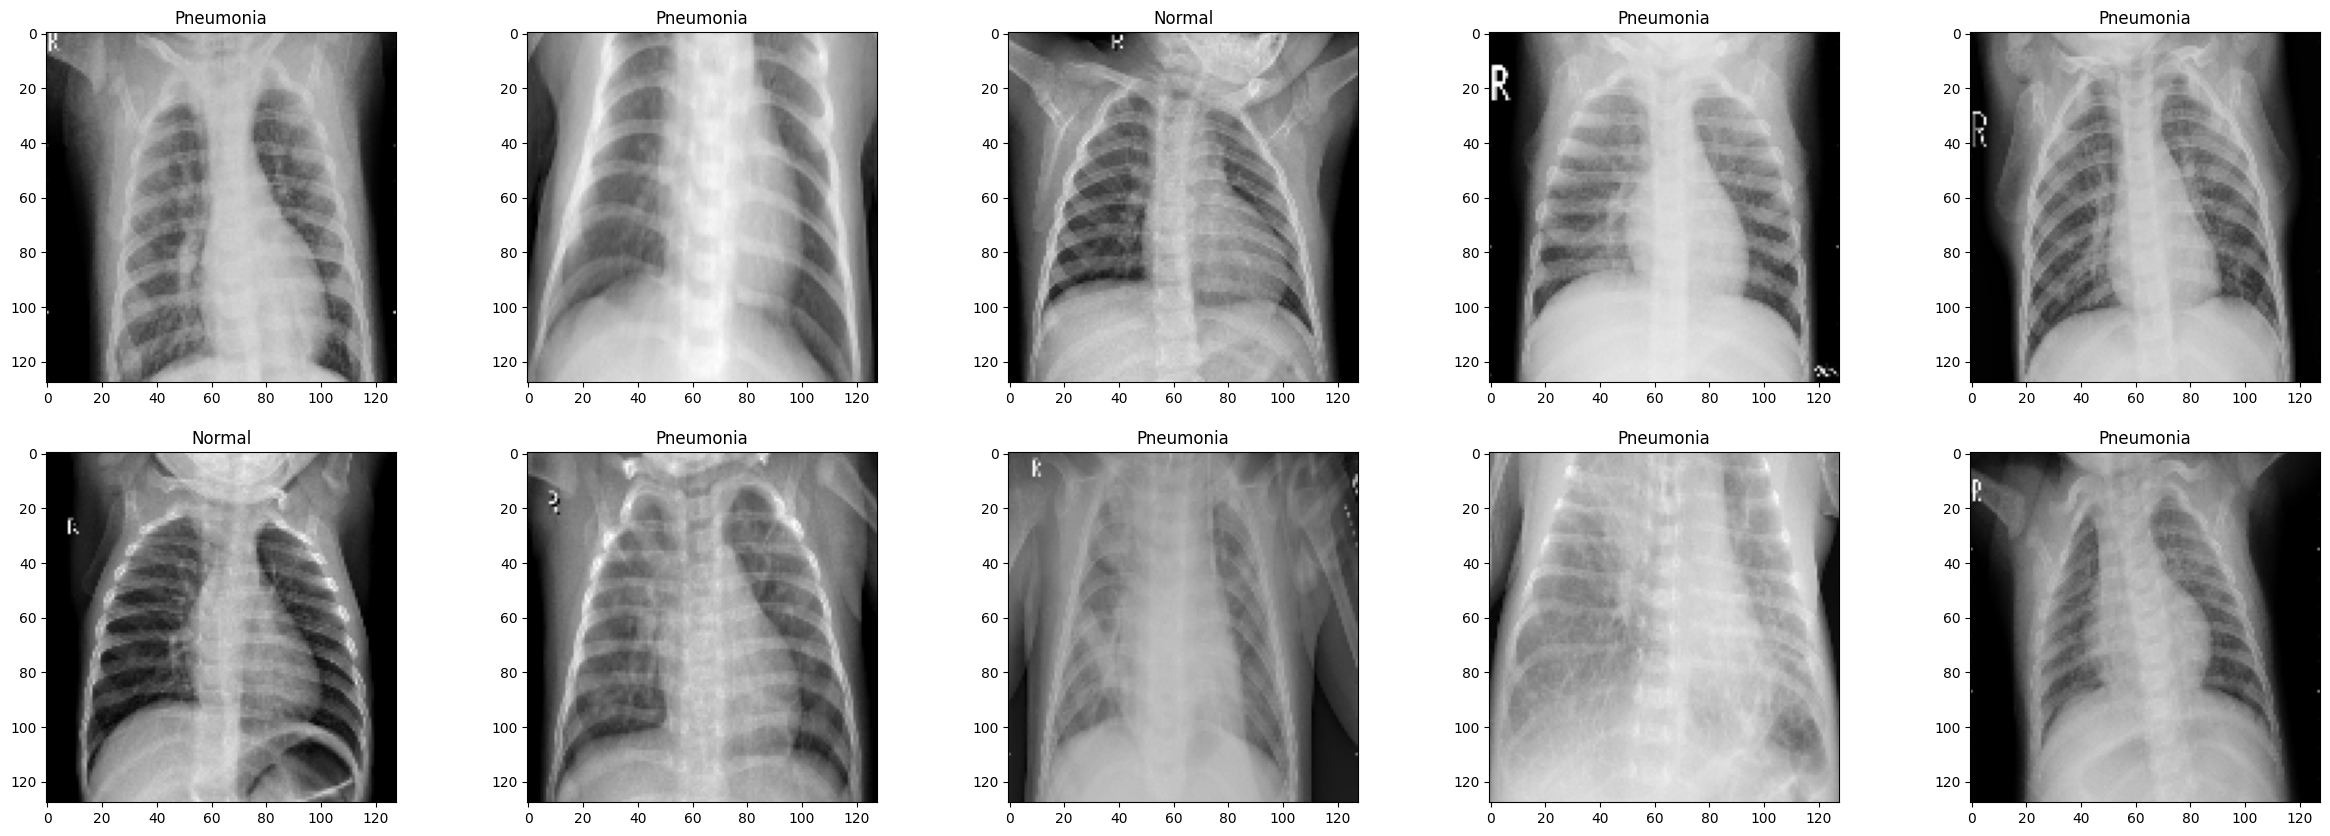

In [10]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(hspace=0.2)

for i in range(1, 11):
    a = fig.add_subplot(2, 5, i)
    m = random.randint(0, len(train_X) - 1)
    if (train_y[m]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')

    plt.imshow(train_X[m], cmap='gray')

Grayscale image to a 3 channel image

In [11]:
X_train = np.stack((train_X, )*3, axis = -1)
y_train = np.array(train_y)
X_test = np.stack((test_X, )*3, axis = -1)
y_test = np.array(test_y)
X_val = np.stack((val_X, )*3, axis = -1)
y_val = np.array(val_y)


# InceptionV3

In [12]:
from keras.applications.inception_v3 import InceptionV3
img_size = [128, 128, 3]
incptn = InceptionV3(input_shape = img_size, weights = 'imagenet', include_top = False)

for layer in incptn.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.models import Model

x = Flatten()(incptn.output)
x = Dense(1024, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs = incptn.input, outputs = x)
model.summary()
model.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 63, 63, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 63, 63, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 61, 61, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 61, 61, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 30, 30, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 30, 30, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 30,258,081 (115.43 MB)

 Trainable params: 8,455,297 (32.25 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 116ms/step - accuracy: 0.8623 - loss: 1.6543 - val_accuracy: 0.8558 - val_loss: 0.6517
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9369 - loss: 0.2672 - val_accuracy: 0.7724 - val_loss: 1.5101
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9594 - loss: 0.1122 - val_accuracy: 0.7484 - val_loss: 1.6309
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9734 - loss: 0.0699 - val_accuracy: 0.8333 - val_loss: 0.7476
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9824 - loss: 0.0458 - val_accuracy: 0.8381 - val_loss: 0.8634
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9711 - loss: 0.0797 - val_accuracy: 0.8301 - val_loss: 0.9275
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9685 - loss: 0.0877 - val_accuracy: 0.7756 - val_loss: 1.3230
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9840 - loss: 0.0491

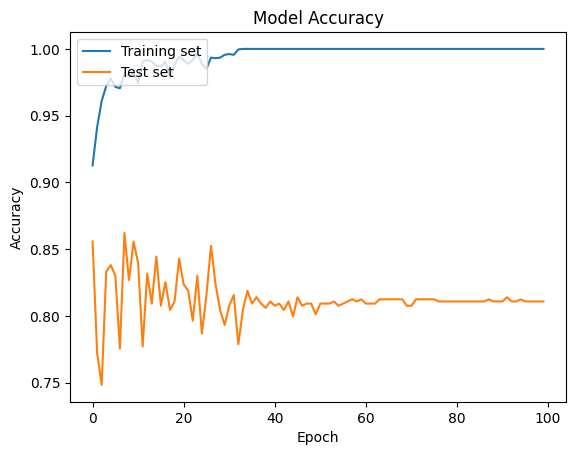

In [15]:
plt.plot(history.history['accuracy'], label='Training set')
plt.plot(history.history['val_accuracy'], label='Test set')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step
Confusion Matrix:
 [[122 112]
 [  6 384]]
Accuracy: 0.81
Precision: 0.86
Recall: 0.75
F1 Score: 0.77


# ResNet152

In [ ]:
from keras.applications.resnet import ResNet152
img_size = [128, 128, 3]
resnet = ResNet152(input_shape = img_size, weights = 'imagenet', include_top = False)

for layer in resnet.layers:
    layer.trainable = False

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.models import Model

x = Flatten()(resnet.output)
x = Dense(1024, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs = resnet.input, outputs = x)
model.summary()
model.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 91,992,065 (350.92 MB)

 Trainable params: 33,621,121 (128.25 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 264ms/step - accuracy: 0.7398 - loss: 0.6109 - val_accuracy: 0.7147 - val_loss: 0.5691
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.8743 - loss: 0.2840 - val_accuracy: 0.6571 - val_loss: 1.1088
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9015 - loss: 0.2227 - val_accuracy: 0.7564 - val_loss: 0.6004
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9133 - loss: 0.2075 - val_accuracy: 0.7228 - val_loss: 0.7582
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.9340 - loss: 0.1656 - val_accuracy: 0.6715 - val_loss: 1.2522
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - accuracy: 0.9293 - loss: 0.1787 - val_accuracy: 0.7388 - val_loss: 0.6928
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9374 - loss: 0.1598 - val_accuracy: 0.8029 - val_loss: 0.4479
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.9265 - los

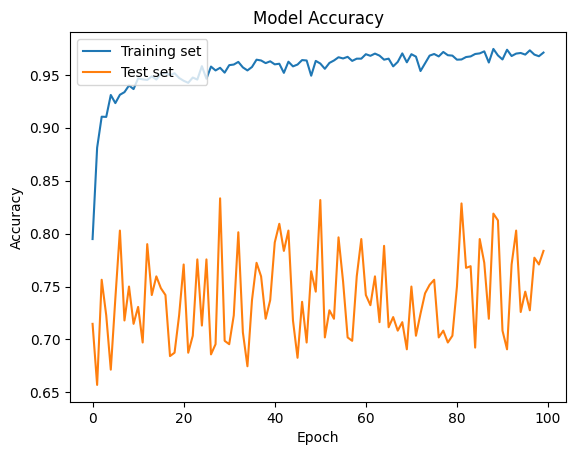

In [ ]:
plt.plot(history.history['accuracy'], label='Training set')
plt.plot(history.history['val_accuracy'], label='Test set')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Confusion Matrix:
 [[104 130]
 [  5 385]]
Accuracy: 0.78
Precision: 0.85
Recall: 0.72
F1 Score: 0.73


# VGG19

In [ ]:
from keras.applications.vgg19 import VGG19
img_size = [128, 128, 3]
model_input = VGG19(input_shape = img_size, weights = 'imagenet', include_top = False)

for layer in model_input.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.models import Model

x = Flatten()(model_input.output)
x = Dense(1024, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs = model_input.input, outputs = x)
model.summary()
model.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,479,681 (108.64 MB)

 Trainable params: 8,455,297 (32.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 84ms/step - accuracy: 0.8912 - loss: 0.2847 - val_accuracy: 0.7548 - val_loss: 0.8844
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9662 - loss: 0.0867 - val_accuracy: 0.7564 - val_loss: 0.9268
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9753 - loss: 0.0687 - val_accuracy: 0.7131 - val_loss: 1.4095
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9707 - loss: 0.0763 - val_accuracy: 0.7340 - val_loss: 1.2488
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9853 - loss: 0.0403 - val_accuracy: 0.8638 - val_loss: 0.4714
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9826 - loss: 0.0528 - val_accuracy: 0.7356 - val_loss: 1.5943
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9878 - loss: 0.0337 - val_accuracy: 0.7035 - val_loss: 1.3264
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9885 - loss: 0.0

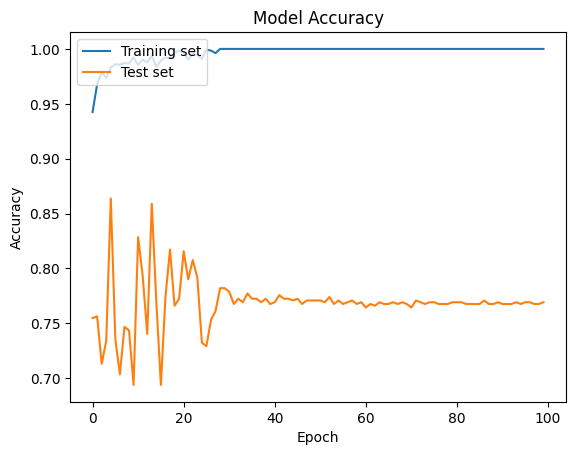

In [ ]:
plt.plot(history.history['accuracy'], label='Training set')
plt.plot(history.history['val_accuracy'], label='Test set')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Confusion Matrix:
 [[ 90 144]
 [  0 390]]
Accuracy: 0.77
Precision: 0.87
Recall: 0.69
F1 Score: 0.70


# Xception

In [ ]:
from keras.applications.xception import Xception
img_size = [128, 128, 3]
xcptn = Xception(input_shape = img_size, weights = 'imagenet', include_top = False)

for layer in xcptn.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.models import Model

x = Flatten()(xcptn.output)
x = Dense(1024, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs = xcptn.input, outputs = x)
model.summary()
model.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 63, 63, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 63, 63, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 63, 63, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
163/163 [==============================] - 15s 68ms/step - loss: 0.8689 - accuracy: 0.9024 - val_loss: 0.6175 - val_accuracy: 0.8526
Epoch 2/100
163/163 [==============================] - 10s 60ms/step - loss: 0.2066 - accuracy: 0.9438 - val_loss: 1.4288 - val_accuracy: 0.7628
Epoch 3/100
163/163 [==============================] - 10s 60ms/step - loss: 0.0894 - accuracy: 0.9703 - val_loss: 0.9965 - val_accuracy: 0.7885
Epoch 4/100
163/163 [==============================] - 10s 59ms/step - loss: 0.0979 - accuracy: 0.9661 - val_loss: 0.9546 - val_accuracy: 0.8125
Epoch 5/100
163/163 [==============================] - 10s 62ms/step - loss: 0.0758 - accuracy: 0.9716 - val_loss: 0.5617 - val_accuracy: 0.8590
Epoch 6/100
163/163 [==============================] - 10s 61ms/step - loss: 0.0952 - accuracy: 0.9651 - val_loss: 0.8533 - val_accuracy: 0.7981
Epoch 7/100
163/163 [==============================] - 10s 59ms/step - loss: 0.0639 - accuracy: 0.9766 - val_loss: 1.3067 - val_ac

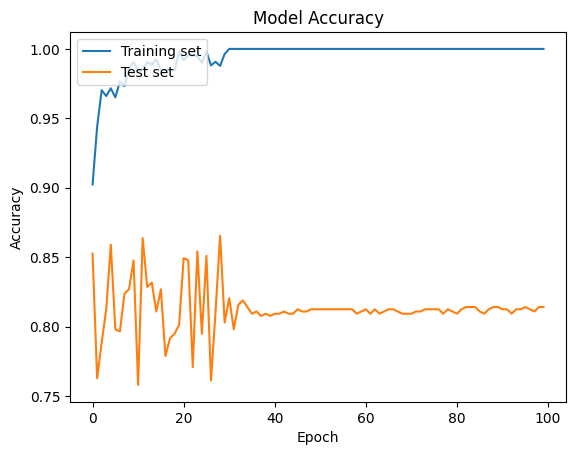

In [ ]:
plt.plot(history.history['accuracy'], label='Training set')
plt.plot(history.history['val_accuracy'], label='Test set')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

20/20 [==============================] - 1s 48ms/step
Confusion Matrix:
 [[122 112]
 [  4 386]]
Accuracy: 0.81
Precision: 0.87
Recall: 0.76
F1 Score: 0.77
